In [13]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [14]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns =iris.feature_names)
df = df[['sepal length (cm)', 'sepal width (cm)']]
target = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print(lda.predict(X_test))



[0 0 2 1 0 1 1 1 0 1 0 1 2 1 1 1 0 0 2 1 2 0 0 1 1 0 2 1 2 1 0 2 1 2 2 0 0
 2 1 1 1 1 2 1 0]


In [15]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,2,2
3,2,1
4,0,0
5,1,1
6,2,1
7,2,1
8,0,0
9,1,1


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7555555555555555

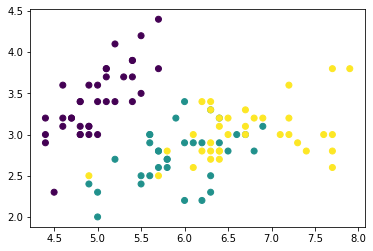

In [17]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c= y_train)

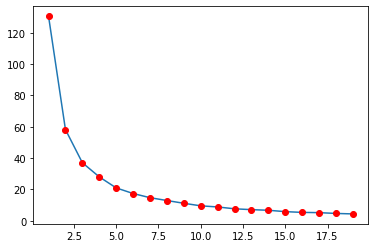

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)
clusters
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df)
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')




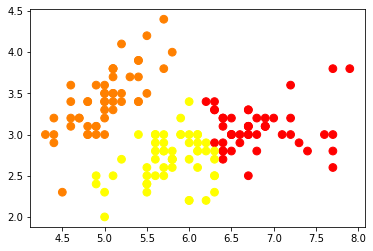

In [19]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], cmap='autumn', c=clusters, s=60)